In [1]:
import os
from pprint import pprint
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import ceci

In [2]:
my_txpipe_dir = "/pbs/home/m/mricci/throng_mricci/desc/TXPipe"
os.chdir(my_txpipe_dir)

import txpipe

# Let's start working with the 1deg2 data file

### Launching a pipeline at CC-IN2P3

Let's have a look at the submission script for this pipeline: `examples/cosmodc2/20deg2-in2p3.sub`:

In [3]:
! cat examples/cosmodc2/1deg2-in2p3.sub

#!/usr/bin/bash
#SBATCH --time=01:00:00
#SBATCH --partition=hpc
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=1
#SBATCH --mem=128000

source /pbs/throng/lsst/users/jzuntz/txpipe-environments/setup-txpipe
ceci examples/cosmodc2/pipeline-1deg2-CL.yml


This will launch a job of up to one hour (it should finish in 30 min) on a single CC-IN2P3 node to run a pipeline.

In a terminal, **navigate to your TXPipe directory and run**:

```
sbatch examples/cosmodc2/1deg2-in2p3.sub
```
to set it running.

In [4]:
# Read the appropriate pipeline configuration, and ask for a flow-chart.
pipeline_file = "examples/cosmodc2/pipeline-1deg2-CL.yml"
flowchart_file = "CL_pipeline.png"


pipeline_config = ceci.Pipeline.build_config(
    pipeline_file,
    flow_chart=flowchart_file,
    dry_run=True
)

# Run the flow-chart pipeline
ceci.run_pipeline(pipeline_config)

0

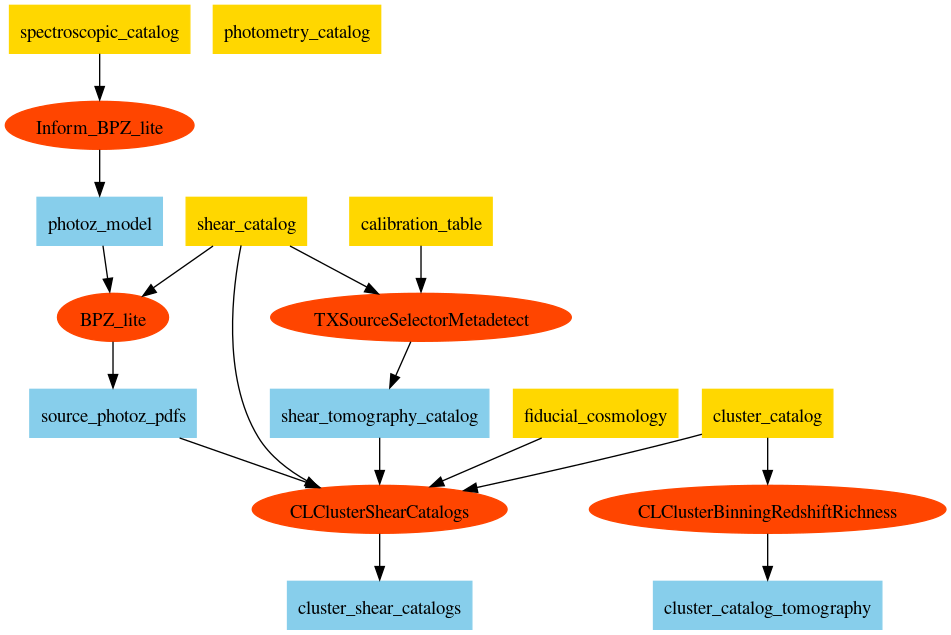

In [5]:
Image(flowchart_file)

In [6]:
# we can also use the notsbook interface for small data
##TOFIX: this saves the output in '.', do not account for the path given....

In [6]:
print("Options for this pipeline and their defaults:")
print(txpipe.extensions.CLClusterBinningRedshiftRichness.config_options)

step3 = txpipe.extensions.CLClusterBinningRedshiftRichness.make_stage(
    # This is the initial cluster catalog - RAs, Decs, richess, redshift, etc.
    cluster_catalog="./data/example/inputs/cluster_catalog.hdf5",
    # This fiducial cosmology is used to convert distance separations to redshifts
    fiducial_cosmology="./data/fiducial_cosmology.yml",
    
    # This is the output for this stage
    cluster_tomography="./data/cosmodc2/outputs-1deg2-CL/cluster_catalog_tomography.hdf5",

    # This contains all the options for this stage. You can override them here, as we do with the max_radius below.
    config="examples/cosmodc2/config-1deg2-CL.yml",    
)


Options for this pipeline and their defaults:
{'zedge': [0.2, 0.4, 0.6, 0.8, 1.0], 'richedge': [5.0, 10.0, 20.0], 'initial_size': 100000, 'chunk_rows': 100000}


In [7]:
step3.run()
step3.finalize()

# Open cluster catalog inpout and outputs

In [9]:
import h5py

In [10]:
output_dir = '/pbs/home/m/mricci/throng_mricci/desc/TXPipe/data/example/inputs'

filename = output_dir + "/cluster_catalog.hdf5"

In [11]:
f = h5py.File(filename, "r")

In [12]:
f.keys()

<KeysViewHDF5 ['clusters', 'provenance']>

In [13]:
dset = f['clusters']

In [14]:
cols = [col for col in dset]
print(cols)

['cluster_id', 'dec', 'ra', 'redshift', 'redshift_err', 'richness', 'richness_err', 'scaleval']


Text(0, 0.5, 'richness')

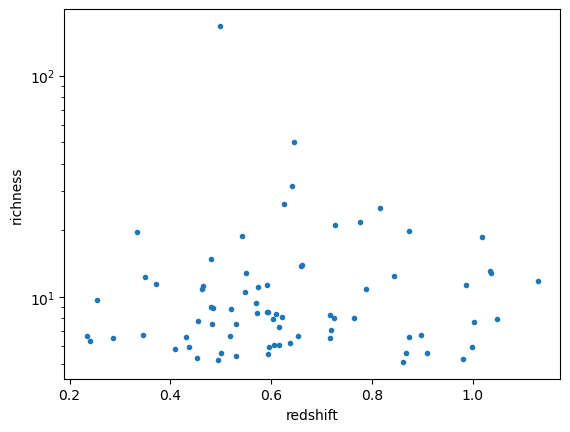

In [15]:
plt.semilogy(dset['redshift'][()], dset['richness'][()],'.', alpha=1)

plt.xlabel('redshift')
plt.ylabel('richness')

In [16]:
# open for reading
#output_dir =  '/pbs/home/m/mricci/throng_mricci/desc/TXPipe/data/cosmodc2/outputs-1deg2-CL'
output_dir = '.'

filename2 = output_dir + "/cluster_catalog_tomography.hdf5"
#f2 = txpipe.data_types.TomographyCatalog(filename2, "r")

f2 = h5py.File(filename2, "r")

In [17]:
f2.keys()

<KeysViewHDF5 ['cluster_bin', 'provenance']>

In [18]:
dat2 = f2['provenance']
dset2 = f2['cluster_bin']

In [19]:
dset2.keys()

<KeysViewHDF5 ['bin_zbin_0_richbin_0', 'bin_zbin_0_richbin_1', 'bin_zbin_1_richbin_0', 'bin_zbin_1_richbin_1', 'bin_zbin_2_richbin_0', 'bin_zbin_2_richbin_1', 'bin_zbin_3_richbin_0', 'bin_zbin_3_richbin_1']>

In [20]:
[print (i, dict(dset2[i].attrs), dset2[i]['redshift'][:].size) for i in dset2.keys()];

bin_zbin_0_richbin_0 {'rich_max': 10.0, 'rich_min': 5.0, 'z_max': 0.4, 'z_min': 0.2} 5
bin_zbin_0_richbin_1 {'rich_max': 20.0, 'rich_min': 10.0, 'z_max': 0.4, 'z_min': 0.2} 3
bin_zbin_1_richbin_0 {'rich_max': 10.0, 'rich_min': 5.0, 'z_max': 0.6, 'z_min': 0.4} 20
bin_zbin_1_richbin_1 {'rich_max': 20.0, 'rich_min': 10.0, 'z_max': 0.6, 'z_min': 0.4} 8
bin_zbin_2_richbin_0 {'rich_max': 10.0, 'rich_min': 5.0, 'z_max': 0.8, 'z_min': 0.6} 13
bin_zbin_2_richbin_1 {'rich_max': 20.0, 'rich_min': 10.0, 'z_max': 0.8, 'z_min': 0.6} 3
bin_zbin_3_richbin_0 {'rich_max': 10.0, 'rich_min': 5.0, 'z_max': 1.0, 'z_min': 0.8} 7
bin_zbin_3_richbin_1 {'rich_max': 20.0, 'rich_min': 10.0, 'z_max': 1.0, 'z_min': 0.8} 3


In [21]:
[col for col in dset2['bin_zbin_0_richbin_0']]

['cluster_id',
 'dec',
 'ra',
 'redshift',
 'redshift_err',
 'richness',
 'richness_err',
 'scaleval']

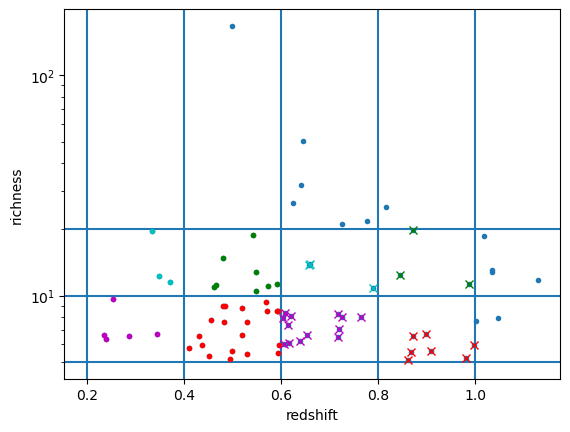

In [22]:
plt.semilogy(dset['redshift'][()], dset['richness'][()],'.', alpha=1)

plt.axvline(0.2)
plt.axvline(0.4)
plt.axvline(0.6)
plt.axvline(0.8)
plt.axvline(1.0)
plt.axhline(5)
plt.axhline(10)
plt.axhline(20)

plt.xlabel('redshift')
plt.ylabel('richness')

plt.plot(dset2['bin_zbin_0_richbin_0']['redshift'][:], 
         dset2['bin_zbin_0_richbin_0']['richness'][:],'m.')
plt.plot(dset2['bin_zbin_0_richbin_1']['redshift'][:], 
         dset2['bin_zbin_0_richbin_1']['richness'][:],'c.')

plt.plot(dset2['bin_zbin_1_richbin_0']['redshift'][:], 
         dset2['bin_zbin_1_richbin_0']['richness'][:],'r.')
plt.plot(dset2['bin_zbin_1_richbin_1']['redshift'][:], 
         dset2['bin_zbin_1_richbin_1']['richness'][:],'g.')

plt.plot(dset2['bin_zbin_2_richbin_0']['redshift'][:], 
         dset2['bin_zbin_2_richbin_0']['richness'][:],'mx')
plt.plot(dset2['bin_zbin_2_richbin_1']['redshift'][:], 
         dset2['bin_zbin_2_richbin_1']['richness'][:],'cx')
 
plt.plot(dset2['bin_zbin_3_richbin_0']['redshift'][:], 
         dset2['bin_zbin_3_richbin_0']['richness'][:],'rx')
plt.plot(dset2['bin_zbin_3_richbin_1']['redshift'][:], 
         dset2['bin_zbin_3_richbin_1']['richness'][:],'gx')
